# ECSE-551 Mini Project 1
Authors:
* Ashley Meagher (260822930)
* Charles Sirois (261158513)  

In [199]:
# To specify where to load the data
in_colab = False
folder_path = 'drive/MyDrive/Colab Notebooks/ECSE 551_MP1'

In [200]:
%load_ext autoreload
%autoreload 2

# imports
import pandas as pd
import numpy as np

if not in_colab:
  from LogisticRegression import LogisticRegression, cost_function

from prettytable import PrettyTable

import matplotlib.pyplot as plt

if in_colab:
  from google.colab import drive
  from google.colab import data_table

  data_table.enable_dataframe_formatter()  # For interactive df viz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
# Colab setup
if in_colab:
  drive.mount('/content/drive')

  # Import LogisticRegression
  import sys
  sys.path.insert(0, folder_path)
  from LogisticRegression import LogisticRegression


## Datasets

In [202]:
seed = 151407718581803891358806045498785340584  # To have reproductible data

# Load files
hp_file_name = 'Hepatits.csv'
ms_file_name = 'Mushroom.csv'

# If running from colab, modify path of data files
if in_colab:
  hp_file_name = f'{folder_path}/{hp_file_name}'
  ms_file_name = f'{folder_path}/{ms_file_name}'


# Load data files
hp_features = ['Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot',
               'Albumin', 'Protime', 'Histology']
hp_df = pd.read_csv(f'{hp_file_name}', names=hp_features + ['Label'])

ms_features = ['Poisonous', 'Cap-shape', 'Cap-color', 'Bruises', 'Odor',
               'Gill-attachment',   'Gill-spacing', 'Gill-size', 'Gill-color',
               'Feature-10', 'Feature-11']
ms_df = pd.read_csv(f'{ms_file_name}', names=ms_features + ['Label'])


# Randomize datasets indices
rng = np.random.default_rng(seed)

n_samples_hp = hp_df.shape[0]
indices_hp = rng.permutation(n_samples_hp)

n_samples_ms = ms_df.shape[0]
indices_ms = rng.permutation(n_samples_ms)

In [203]:
# Hepatitis dataframe
hp_df

,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Label
0,0.117650,0.77889,0.42623,0.27273,0.638300,0.57675,0.069172,0.066667,1
1,0.176470,0.40201,0.67213,0.31313,0.082742,0.50969,0.518360,0.100000,1
2,0.058824,1.00000,0.62295,0.43434,0.000000,0.63934,0.561910,0.016667,1
3,0.470590,0.83920,0.86885,0.46465,0.273050,0.56036,0.037148,0.366670,1
4,0.529410,0.72864,0.65574,0.46465,0.153660,0.56483,0.238680,0.316670,1
...,...,...,...,...,...,...,...,...,...
339,0.352940,0.62814,0.55738,0.30303,0.141840,0.44709,0.164820,0.183330,0
340,0.411760,0.59799,0.00000,0.00000,0.000000,0.37556,0.055935,0.266670,0
341,0.411760,0.71357,0.49180,0.33333,0.224590,0.42921,0.260030,0.666670,0
342,0.058824,0.50251,0.54098,0.15152,0.066194,0.35171,0.251070,0.083333,0


In [26]:
# Mushroom dataframe
ms_df

,Poisonous,Cap-shape,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Feature-10,Feature-11,Label
0,0.24779,0.35274,0.10,0.102740,0.113520,0.211270,0.095406,0.53485,0.66142,0.21557,0.36923,1
1,0.19469,0.32192,0.06,0.349320,0.080134,0.140850,0.042403,0.44974,0.52756,0.15569,0.36923,1
2,0.19469,0.32192,0.06,0.349320,0.080134,0.140850,0.042403,0.44974,0.52756,0.15569,0.36923,1
3,0.13274,0.30137,0.00,0.089041,0.111850,0.070423,0.010601,0.34703,0.66929,0.12575,0.47692,1
4,0.24779,0.27397,0.13,0.102740,0.110180,0.464790,0.194350,0.38225,0.54331,0.15569,0.36923,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1618,0.46018,0.76712,0.34,0.075342,0.111850,0.436620,0.512370,0.58180,0.32283,0.11976,0.16923,0
1619,0.31858,0.41781,0.21,0.054795,0.103510,0.056338,0.024735,0.49376,0.36220,0.11377,0.16923,0
1620,0.41593,0.19863,0.39,0.089041,0.086811,0.154930,0.088339,0.61115,0.40945,0.19162,0.27692,0
1621,0.35398,0.46575,0.11,0.095890,0.120200,0.154930,0.088339,0.57447,0.51969,0.08982,0.23077,0


## Datasets Analysis

### Manipulate the datasets

In [27]:
# Data Manipulation
class data_manipulation:
    def __init__(self):
        self.dataset = None

    def load_dataset(self, df):
        self.df = df

    def square_data(self):
        if self.df is not None:
            squaredata = self.df.apply(lambda x: x**2)
            return squaredata
        else:
            print("DataFrame has not been loaded.")

    def cube_data(self):
        if self.df is not None:
            cubedata = self.df.apply(lambda x: x**3)
            return cubedata
        else:
            print("DataFrame has not been loaded.")

    def sqrt_data(self):
        if self.df is not None:
            sqrtdata = self.df.apply(lambda x: x**0.5)
            return sqrtdata
        else:
            print("DataFrame has not been loaded.")

    def ln_data(self):
        if self.df is not None:
            logdata = self.df.apply(lambda x: np.log(x+1))
            # Add 1 so we don't end up trying to take the log of 0
            return logdata
        else:
            print("DataFrame has not been loaded.")

### Plot Histograms

In [28]:
class HistogramPlotter:
    def __init__(self, data):
        self.data = data
        self.num_features =  len(self.data.iloc[1])-1

    def plot_histograms(self):
        self.num_bins = 15
        self.color0 = 'blue'
        self.color1 = 'red'
        self.column = 3
        self.edge = 'black'

         # Separate the  DataFrame into two groups based on the 'Label' column
        self.class0 = self.data[self.data['Label'] == 0]
        self.class1 = self.data[self.data['Label'] == 1]

        fig, axs = plt.subplots(int(np.ceil(self.num_features/3)),self.column)
        fig.set_size_inches(6.5, 7)

        for i in range(self.num_features):
          row = i // self.column
          col = i % self.column

          axs[row, col].hist(self.class0.iloc[:,i], bins = self.num_bins,
                             color= self.color0, edgecolor= self.edge, alpha=0.4, label='Class 0')
          axs[row, col].hist(self.class1.iloc[:,i], bins = self.num_bins,
                             color= self.color1, edgecolor= self.edge, alpha=0.4, label='Class 1')
          axs[row, col].set_xlabel('', fontsize = 8)
          axs[row, col].set_title('Feature ' + str(i+1), fontsize = 10)

          class0_mean = np.mean(self.class0.iloc[:, i])
          class1_mean = np.mean(self.class1.iloc[:, i])
          class0_std = np.std(self.class0.iloc[:, i])
          class1_std = np.std(self.class1.iloc[:, i])


          axs[row, col].text(0.5, 0.55, f"$\\mu$ Class 0: {class0_mean:.2f}\n $\\mu$ Class 1: {class1_mean:.2f}\n $\\sigma$ Class 0: {class0_std:.2f}\n $\\sigma$ Class 0: {class1_std:.2f}", transform=axs[row, col].transAxes, fontsize = 6)

        axs[-1, 1].legend(loc='lower right', fontsize = 8)
        plt.tight_layout()
        plt.show()

    def shape(self):
        print(self.class0.shape, self.class1.shape)

#### Hepatits data

In [29]:
# Hepatits Data
hp_data = data_manipulation()
hp_data.load_dataset(hp_df)  # Load the DataFrame
hp_sq_df = hp_data.square_data()
hp_cb_df = hp_data.cube_data()
hp_sqrt_df = hp_data.sqrt_data()
hp_ln_df = hp_data.ln_data()
hp_ln_df['Label'] = np.ceil(hp_ln_df['Label'])

Original data:


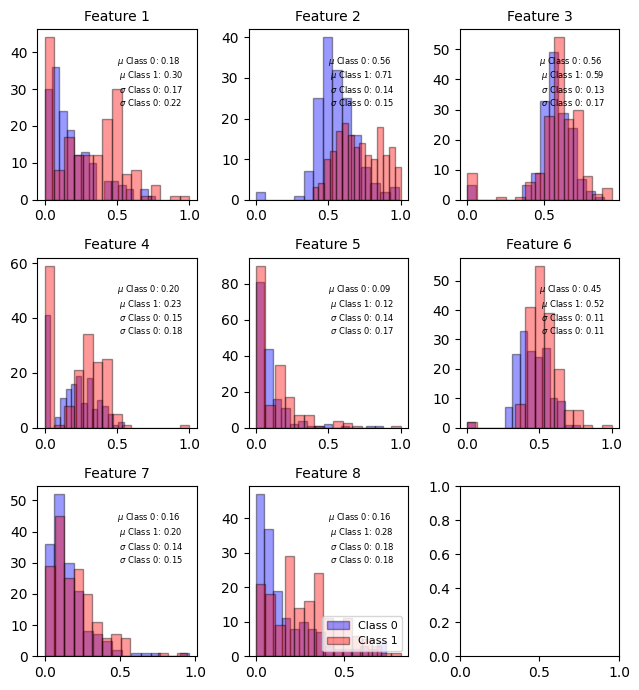

Squared data:


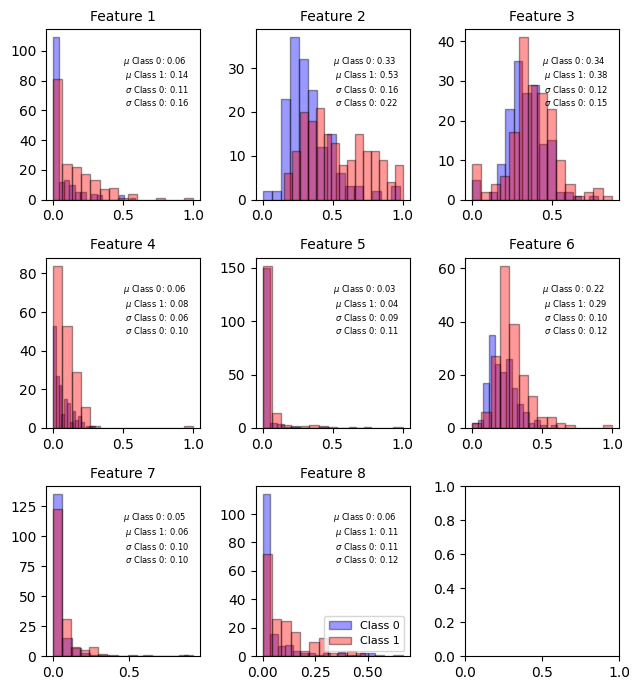

Cubed data:


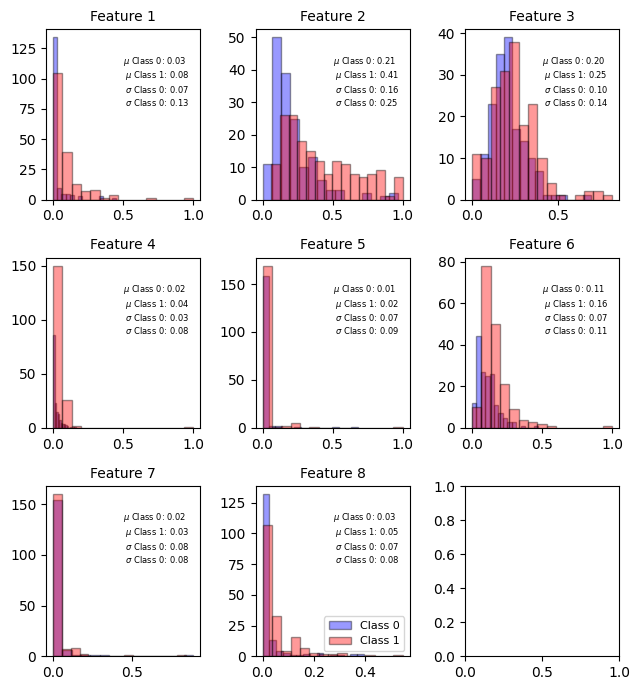

Square rooted data:


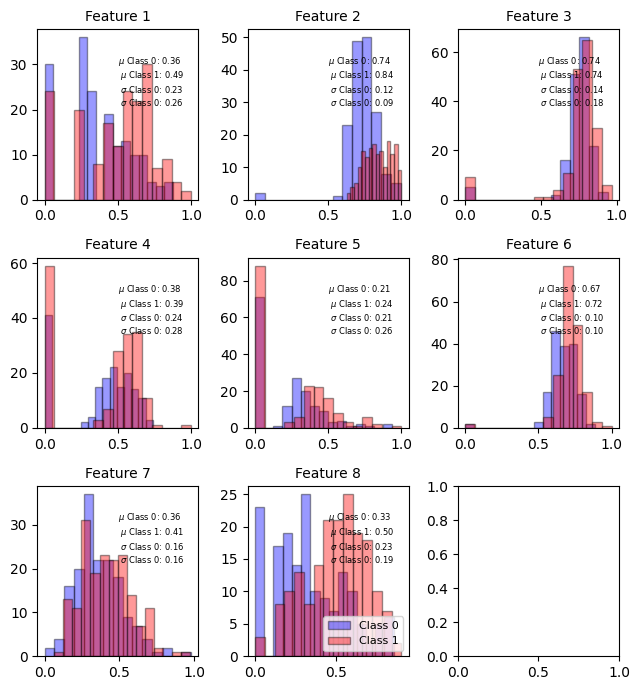

Logarithmic data:


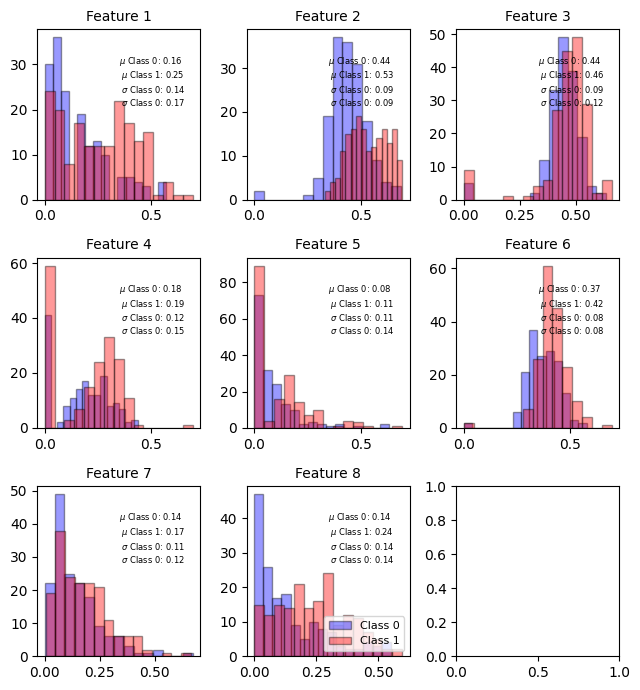

Shape of the classes:
(165, 9) (179, 9)


In [30]:
# Hepatits results
hep_results = HistogramPlotter(hp_df)
print("Original data:")
hp_histogram = hep_results.plot_histograms()

print("Squared data:")
hep_sq_results = HistogramPlotter(hp_sq_df)
hp_sq_histogram = hep_sq_results.plot_histograms()

print("Cubed data:")
hep_cb_results = HistogramPlotter(hp_cb_df)
hp_cb_histogram = hep_cb_results.plot_histograms()

print("Square rooted data:")
hep_sqrts_results = HistogramPlotter(hp_sqrt_df)
hp_sqrt_histogram = hep_sqrts_results.plot_histograms()

print("Logarithmic data:")
hep_ln_results = HistogramPlotter(hp_ln_df)
hp_ln_histogram = hep_ln_results.plot_histograms()

print("Shape of the classes:")
hep_results.shape()

#### Mushroom Data

In [31]:
# Mushroom Data
ms_data = data_manipulation()
ms_data.load_dataset(ms_df)  # Load the DataFrame
ms_sq_df = ms_data.square_data()
ms_cb_df = ms_data.cube_data()
ms_sqrt_df = ms_data.sqrt_data()
ms_ln_df = ms_data.ln_data()
ms_ln_df['Label'] = np.ceil(ms_ln_df['Label'])

Original data:


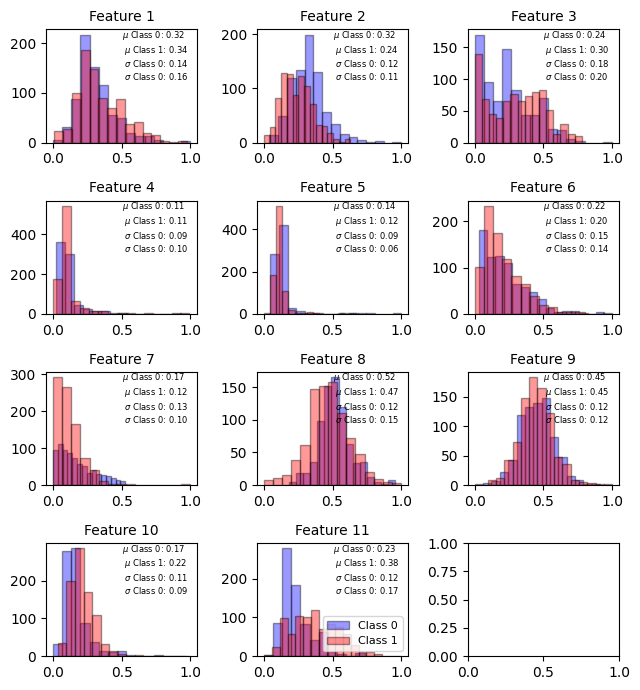

Squared data:


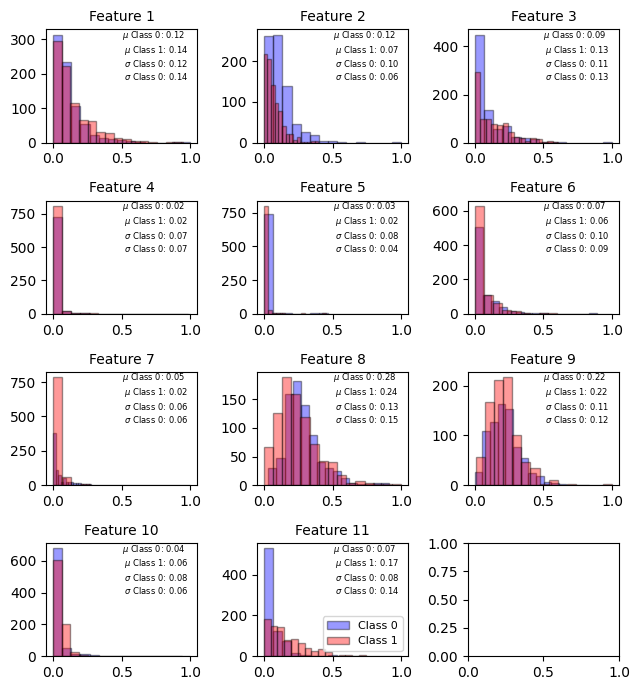

Cubed data:


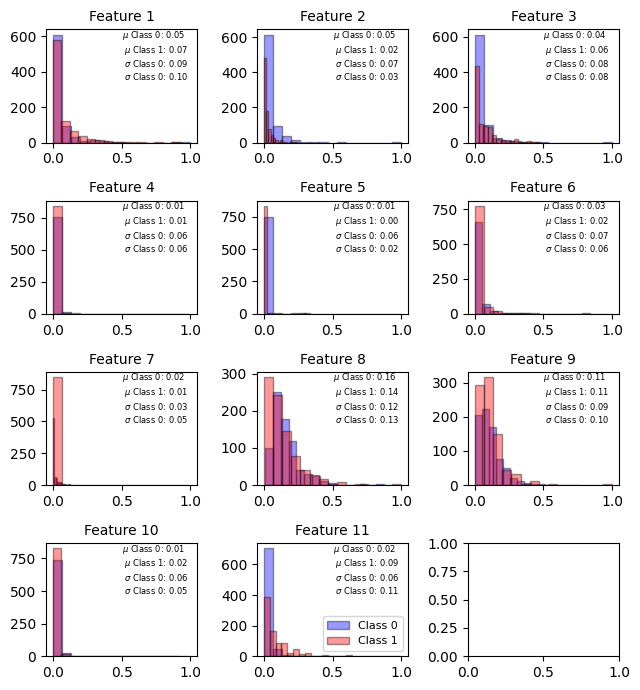

Square rooted data:


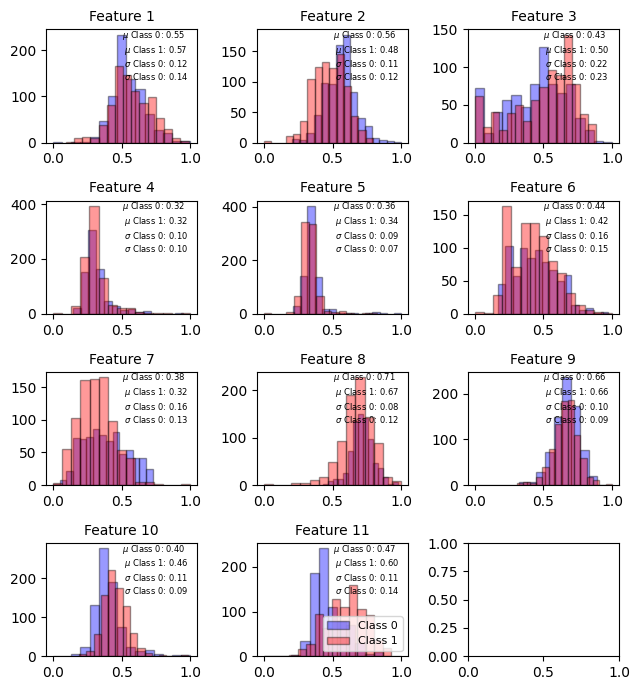

Logarithmic data:


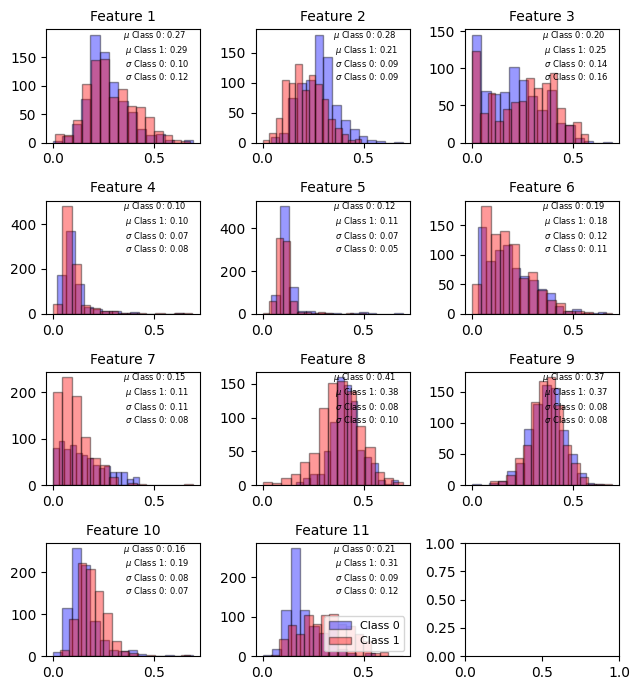

Shape of the classes:
(768, 12) (855, 12)


In [32]:
# Mushroom results
ms_results = HistogramPlotter(ms_df)
print("Original data:")
ms_histogram = ms_results.plot_histograms()

print("Squared data:")
ms_sq_results = HistogramPlotter(ms_sq_df)
ms_sq_histogram = ms_sq_results.plot_histograms()

print("Cubed data:")
ms_cb_results = HistogramPlotter(ms_cb_df)
ms_cb_histogram = ms_cb_results.plot_histograms()

print("Square rooted data:")
ms_sqrt_results = HistogramPlotter(ms_sqrt_df)
ms_sqrt_histogram = ms_sqrt_results.plot_histograms()

print("Logarithmic data:")
ms_ln_results = HistogramPlotter(ms_ln_df)
ms_ln_histogram = ms_ln_results.plot_histograms()

print("Shape of the classes:")
ms_results.shape()

## Gradient Descent Algorithm Validation

Section showing the implementation of the GD algorithm

Validate the algo on a small dataset (n=100, m=2)

In [204]:
n_training = 100
m = 2

hp_training_dataset = hp_df.iloc[indices_hp[:n_training]]

X_train_hp_gd = hp_training_dataset[hp_features[0:m]].to_numpy()
y_train_hp_gd = hp_training_dataset["Label"].to_numpy()


--- Gradiant Descent ---
Starting weights: [0, -5]
Learning rate: 5	 Type: normal
Stop tolerance: 1e-06
Regulariztion: Type: None
Finding solution...
Solution found after 54 iterations (4.021883010864258 ms). Optimal cost: 0.650893946568298


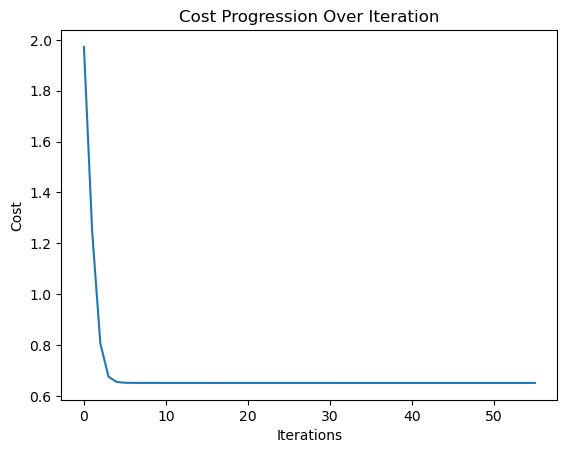

Supposed Max of J: 0.6509029524435781 for w_0: 2.3642800888401934, w_1: -0.34180526962078606


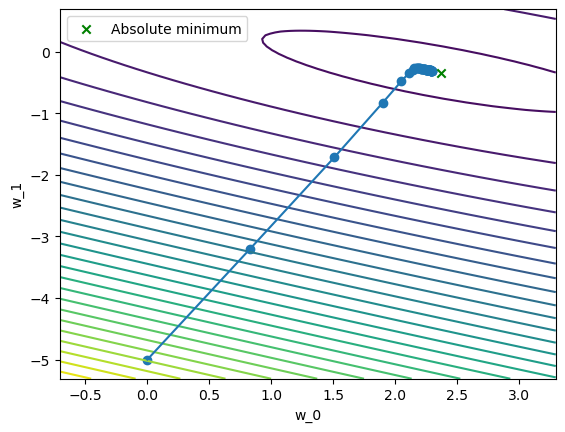

In [205]:
# Parameters
reg_type = "none"
max_iter = 2000
tol = 1e-6
alpha = 5

model_gd_test = LogisticRegression(
    reg=None,
    max_iter=max_iter,
    alpha=alpha,
    tol=tol,
)

model_gd_test.fit(X_train_hp_gd, y_train_hp_gd, w_start=[0, -5], verbose=True)

model_gd_test.plot_training()

Check the impact of $\alpha$.

For $\alpha$ constant:


--- Gradiant Descent ---
Starting weights: [1. 1.]
Learning rate: 0.01	 Type: normal
Stop tolerance: 1e-07
Regulariztion: Type: None
Finding solution...
Max Step reached (249) (11.918783187866211 ms) - Unable to find solution within tolerance (1e-07).
Final cost: 0.6805691520049125

--- Gradiant Descent ---
Starting weights: [1. 1.]
Learning rate: 0.1	 Type: normal
Stop tolerance: 1e-07
Regulariztion: Type: None
Finding solution...
Max Step reached (249) (11.997222900390625 ms) - Unable to find solution within tolerance (1e-07).
Final cost: 0.658924683956177

--- Gradiant Descent ---
Starting weights: [1. 1.]
Learning rate: 1	 Type: normal
Stop tolerance: 1e-07
Regulariztion: Type: None
Finding solution...
Max Step reached (249) (15.646934509277344 ms) - Unable to find solution within tolerance (1e-07).
Final cost: 0.6510898900614884

--- Gradiant Descent ---
Starting weights: [1. 1.]
Learning rate: 10	 Type: normal
Stop tolerance: 1e-07
Regulariztion: Type: None
Finding solution...
S

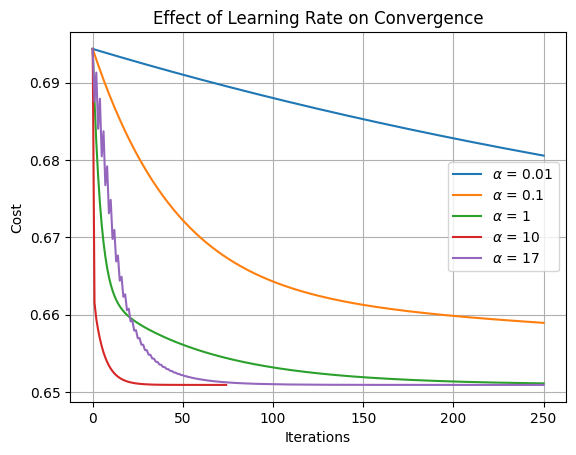

In [54]:
# Parameters
max_iter = 250
tol = 1e-7

models_gd_n = {}
models_gd_n['0.01'] = LogisticRegression(
    reg=None,
    max_iter=max_iter,
    alpha=0.01,
    tol=tol,
    learning_rate_type='normal'
)
models_gd_n['0.1'] = LogisticRegression(
    reg=None,
    max_iter=max_iter,
    alpha=0.1,
    tol=tol,
    learning_rate_type='normal'
)
models_gd_n['1'] = LogisticRegression(
    reg=None,
    max_iter=max_iter,
    alpha=1,
    tol=tol,
    learning_rate_type='normal'
)
models_gd_n['10'] = LogisticRegression(
    reg=None,
    max_iter=max_iter,
    alpha=10,
    tol=tol,
    learning_rate_type='normal'
)
models_gd_n['17'] = LogisticRegression(
    reg=None,
    max_iter=max_iter,
    alpha=17,
    tol=tol,
    learning_rate_type='normal'
)

# Normal - Cost progression
fig, ax = plt.subplots()

for label, model in models_gd_n.items():
    model.fit(X_train_hp_gd, y_train_hp_gd, verbose=True)

    ax.plot(model._cost_array, label=f"$\\alpha$ = {label}")

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Effect of Learning Rate on Convergence")
plt.grid(True)
plt.show()

For $\alpha$ decaying:


--- Gradiant Descent ---
Starting weights: [1. 1.]
Learning rate: 1	 Type: decaying
Stop tolerance: 1e-08
Regulariztion: Type: None
Finding solution...
Max Step reached (249) (18.105745315551758 ms) - Unable to find solution within tolerance (1e-08).
Final cost: 0.6696003156809239

--- Gradiant Descent ---
Starting weights: [1. 1.]
Learning rate: 5	 Type: decaying
Stop tolerance: 1e-08
Regulariztion: Type: None
Finding solution...
Max Step reached (249) (19.52528953552246 ms) - Unable to find solution within tolerance (1e-08).
Final cost: 0.6581221461084538

--- Gradiant Descent ---
Starting weights: [1. 1.]
Learning rate: 10	 Type: decaying
Stop tolerance: 1e-08
Regulariztion: Type: None
Finding solution...
Max Step reached (249) (18.12148094177246 ms) - Unable to find solution within tolerance (1e-08).
Final cost: 0.6551724400421414

--- Gradiant Descent ---
Starting weights: [1. 1.]
Learning rate: 100	 Type: decaying
Stop tolerance: 1e-08
Regulariztion: Type: None
Finding solution.

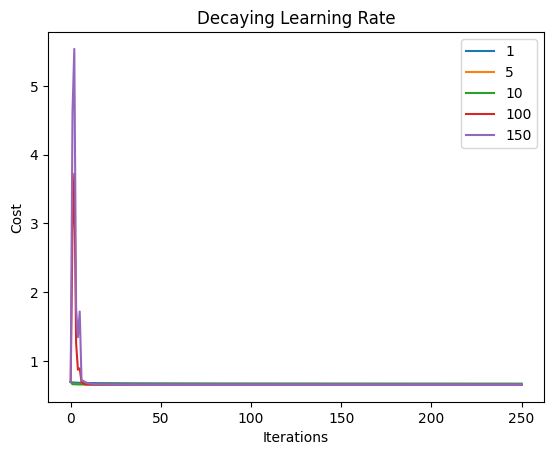

In [55]:
# Dec - Cost progression

# Parameters
max_iter = 250
tol = 1e-8

models_gd = {}
models_gd['M1'] = LogisticRegression(
    reg=None,
    max_iter=max_iter,
    alpha=1,
    tol=tol,
    learning_rate_type='decaying'
)
models_gd['M2'] = LogisticRegression(
    reg=None,
    max_iter=max_iter,
    alpha=5,
    tol=tol,
    learning_rate_type='decaying'
)
models_gd['M3'] = LogisticRegression(
    reg=None,
    max_iter=max_iter,
    alpha=10,
    tol=tol,
    learning_rate_type='decaying'
)
models_gd['M4'] = LogisticRegression(
    reg=None,
    max_iter=max_iter,
    alpha=100,
    tol=tol,
    learning_rate_type='decaying'
)
models_gd['M5'] = LogisticRegression(
    reg=None,
    max_iter=max_iter,
    alpha=150,
    tol=tol,
    learning_rate_type='decaying'
)

# Plot
fig, ax = plt.subplots()

for label, model in models_gd.items():
    model.fit(X_train_hp_gd, y_train_hp_gd, verbose=True)

    ax.plot(model._cost_array, label=model.alpha)

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Decaying Learning Rate")
plt.show()

## Hyperparameters

To find the best combination of $\alpha$, $\epsilon$ and $\lambda$

### Test Train Split

Split the train and test datasets followin the `train_prop`. Also add a column of 1s at the beggining of the datasets for the bias term.

In [37]:
# Training proportion
train_prop = 0.8

n_training_hp = int(n_samples_hp * train_prop)
n_training_ms = int(n_samples_ms * train_prop)

# Hepatitis Datasets
hp_training_dataset = hp_df.iloc[indices_hp[:n_training_hp]]
hp_test_dataset = hp_df.iloc[indices_hp[n_training_hp:]]

X_train_hp = hp_training_dataset[hp_features].to_numpy()
X_train_hp = np.insert(X_train_hp, 0, 1, axis=1)
y_train_hp = hp_training_dataset["Label"].to_numpy()

X_test_hp = hp_test_dataset[hp_features].to_numpy()
X_test_hp = np.insert(X_test_hp, 0, 1, axis=1)  # Insert col of 1s at the beggining
y_test_hp = hp_test_dataset["Label"].to_numpy()

print(f"Dataset splitted using the following proportion: {np.round(train_prop*100)}% train/{np.round((1-train_prop)*100)}% test")

print(f"Hepatitis:")
print(f"-Train dataset: X ({X_train_hp.shape})\t y({y_train_hp.shape})")
print(f"-Test dataset: X ({X_test_hp.shape})\t y({y_test_hp.shape})")

# Mushrooms Datasets
ms_training_dataset = ms_df.iloc[indices_ms[:n_training_ms]]
ms_test_dataset = ms_df.iloc[indices_ms[n_training_ms:]]

X_train_ms = ms_training_dataset[ms_features].to_numpy()
X_train_ms = np.insert(X_train_ms, 0, 1, axis=1)
y_train_ms = ms_training_dataset["Label"].to_numpy()

X_test_ms = ms_test_dataset[ms_features].to_numpy()
X_test_ms = np.insert(X_test_ms, 0, 1, axis=1)  # Insert col of 1s at the beggining
y_test_ms = ms_test_dataset["Label"].to_numpy()

print(f"\nMushroom:")
print(f"-Train dataset: X ({X_train_ms.shape})\t y({y_train_ms.shape})")
print(f"-Test dataset: X ({X_test_ms.shape})\t y({y_test_ms.shape})")


Dataset splitted using the following proportion: 80.0% train/20.0% test
Hepatitis:
-Train dataset: X ((275, 9))	 y((275,))
-Test dataset: X ((69, 9))	 y((69,))

Mushroom:
-Train dataset: X ((1298, 12))	 y((1298,))
-Test dataset: X ((325, 12))	 y((325,))


### Learning Rate


The best value for $\alpha$.

Two types of learning rate:
- Normal: lr = $\alpha$
- Decaying: lr = $\alpha$/(k+1), k is the epoch

For each model, 10-fold validation is used to compute the model's average accuracy.

Range of alpha: [1.00000000e-02 2.78255940e-02 7.74263683e-02 2.15443469e-01
 5.99484250e-01 1.66810054e+00 4.64158883e+00 1.29154967e+01
 3.59381366e+01 1.00000000e+02]

Fitting for model: Model CV
	Hepatitis...


/content/drive/MyDrive/Colab Notebooks/ECSE 551_MP1/LogisticRegression.py:16: RuntimeWarning: divide by zero encountered in log
  J = (-1 / n) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
/content/drive/MyDrive/Colab Notebooks/ECSE 551_MP1/LogisticRegression.py:16: RuntimeWarning: divide by zero encountered in log
  J = (-1 / n) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
/content/drive/MyDrive/Colab Notebooks/ECSE 551_MP1/LogisticRegression.py:16: RuntimeWarning: divide by zero encountered in log
  J = (-1 / n) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
/content/drive/MyDrive/Colab Notebooks/ECSE 551_MP1/LogisticRegression.py:16: RuntimeWarning: divide by zero encountered in log
  J = (-1 / n) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
/content/drive/MyDrive/Colab Notebooks/ECSE 551_MP1/LogisticRegression.py:16: RuntimeWarning: divide by zero encountered in log
  J = (-1 / n) * (np.dot(y.T, np.log(h)) + np.dot((1



	Mushroom...


/content/drive/MyDrive/Colab Notebooks/ECSE 551_MP1/LogisticRegression.py:16: RuntimeWarning: divide by zero encountered in log
  J = (-1 / n) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
/content/drive/MyDrive/Colab Notebooks/ECSE 551_MP1/LogisticRegression.py:16: RuntimeWarning: divide by zero encountered in log
  J = (-1 / n) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
/content/drive/MyDrive/Colab Notebooks/ECSE 551_MP1/LogisticRegression.py:16: RuntimeWarning: divide by zero encountered in log
  J = (-1 / n) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
/content/drive/MyDrive/Colab Notebooks/ECSE 551_MP1/LogisticRegression.py:16: RuntimeWarning: divide by zero encountered in log
  J = (-1 / n) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
/content/drive/MyDrive/Colab Notebooks/ECSE 551_MP1/LogisticRegression.py:16: RuntimeWarning: divide by zero encountered in log
  J = (-1 / n) * (np.dot(y.T, np.log(h)) + np.dot((1


Fitting for model: Model CV - dec
	Hepatitis...


	Mushroom...


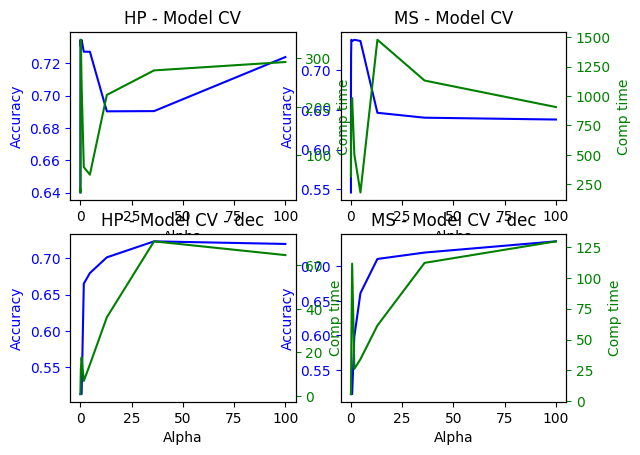

In [38]:
max_iter = 4000
model_dict = {}

alphas = np.logspace(-2, 2, 10)
print(f"Range of alpha: {alphas}")

model_dict["Model CV"] = LogisticRegression(
    reg=None,
    reg_cst=0,
    max_iter=max_iter,
    alpha=alphas,
    tol=1e-6,
    k_cv=10,
    learning_rate_type="normal",
)

model_dict["Model CV - dec"] = LogisticRegression(
    reg=None,
    reg_cst=0,
    max_iter=max_iter,
    alpha=alphas,
    tol=1e-6,
    k_cv=10,
    learning_rate_type="decaying",
)

fig, axis = plt.subplots(2, 2)

# Create a figure and axis for the first plot
plt_row = 0
for model_name, model in model_dict.items():
    print(f"\nFitting for model: {model_name}")
    # Hepatitis
    print(f"\tHepatitis...")
    model.fit(X_train_hp, y_train_hp, verbose=False)
    res_hp = model.results

    # Mushroom
    print(f"\n\n\tMushroom...")
    model.fit(X_train_ms, y_train_ms, verbose=False)
    res_ms = model.results

    # Plots
    ax = axis[plt_row, 0]
    ax.plot(res_hp['Alpha'], res_hp['Accuracy'], color='blue', label='Accuracy')
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Accuracy', color='blue')
    ax.tick_params('y', colors='blue')

    ax2 = ax.twinx()
    ax2.plot(res_hp['Alpha'], res_hp['Comp time'], color='green', label='Line 2')
    ax2.set_ylabel('Comp time', color='green')
    ax2.tick_params('y', colors='green')

    plt.title(f'HP - {model_name}')

    ax = axis[plt_row, 1]
    ax.plot(res_ms['Alpha'], res_ms['Accuracy'], color='blue', label='Accuracy')
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Accuracy', color='blue')
    ax.tick_params('y', colors='blue')

    ax2 = ax.twinx()
    ax2.plot(res_ms['Alpha'], res_ms['Comp time'], color='green', label='Line 2')
    ax2.set_ylabel('Comp time', color='green')
    ax2.tick_params('y', colors='green')

    plt.title(f'MS - {model_name}')

    plt_row += 1

plt.show()


### Regularization

To check the impact of $\lambda$ on the accuracy and weights values.

In [39]:
# Model params
max_iter = 4000
alpha = 0.1
tol = 1e-6

lambdas = np.linspace(0, 25, 100)
print(f"Testing the effect of lambda on the model's accuracy")

# hp arrays
train_acc_l1_array_hp = []
test_acc_l1_array_hp = []
l1_weights_hp = []

train_acc_l2_array_hp = []
test_acc_l2_array_hp = []
l2_weights_hp = []

# ms arrays
train_acc_l1_array_ms = []
test_acc_l1_array_ms = []
l1_weights_ms = []

train_acc_l2_array_ms = []
test_acc_l2_array_ms = []
l2_weights_ms = []


for each_lambda in lambdas:
    print(f"\rIter: {np.where(each_lambda == lambdas)[0][0] + 1}/{len(lambdas)} Lambda {each_lambda}", end="")

    model_l1 = LogisticRegression(
        reg='l1',
        reg_cst=each_lambda,
        max_iter=max_iter,
        alpha=alpha,
        tol=tol,
        k_cv=0, # No CV
        learning_rate_type="normal",
    )

    model_l2 = LogisticRegression(
        reg='l2',
        reg_cst=each_lambda,
        max_iter=max_iter,
        alpha=alpha,
        tol=tol,
        k_cv=0, # No CV
        learning_rate_type="normal",
    )

    ### Hepatitis ###
    model_l1.fit(X_train_hp, y_train_hp, verbose=False)
    model_l2.fit(X_train_hp, y_train_hp, verbose=False)

    # l1 accuracy
    train_acc_l1_hp = model_l1.accu_eval(X_train_hp, y_train_hp)
    test_acc_l1_hp = model_l1.accu_eval(X_test_hp, y_test_hp)
    train_acc_l1_array_hp.append(train_acc_l1_hp)
    test_acc_l1_array_hp.append(test_acc_l1_hp)
    l1_weights_hp.append(model_l1.weights)

    # l2 accuracy
    train_acc_l2_hp = model_l2.accu_eval(X_train_hp, y_train_hp)
    test_acc_l2_hp = model_l2.accu_eval(X_test_hp, y_test_hp)
    train_acc_l2_array_hp.append(train_acc_l2_hp)
    test_acc_l2_array_hp.append(test_acc_l2_hp)
    l2_weights_hp.append(model_l2.weights)

    ### Mushrooms ###
    model_l1.fit(X_train_ms, y_train_ms, verbose=False)
    model_l2.fit(X_train_ms, y_train_ms, verbose=False)

    # l1 accuracy
    train_acc_ms = model_l1.accu_eval(X_train_ms, y_train_ms)
    test_acc_ms = model_l1.accu_eval(X_test_ms, y_test_ms)
    train_acc_l1_array_ms.append(train_acc_ms)
    test_acc_l1_array_ms.append(test_acc_ms)
    l1_weights_ms.append(model_l1.weights)

    # l2 accuracy
    train_acc_ms = model_l2.accu_eval(X_train_ms, y_train_ms)
    test_acc_ms = model_l2.accu_eval(X_test_ms, y_test_ms)
    train_acc_l2_array_ms.append(train_acc_ms)
    test_acc_l2_array_ms.append(test_acc_ms)
    l2_weights_ms.append(model_l2.weights)


Testing the effect of lambda on the model's accuracy
Iter: 100/100 Lambda 25.0

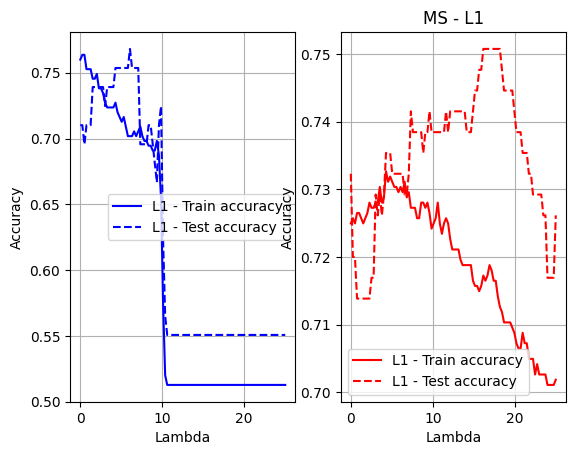

Text(0.5, 1.0, 'MS - L2')

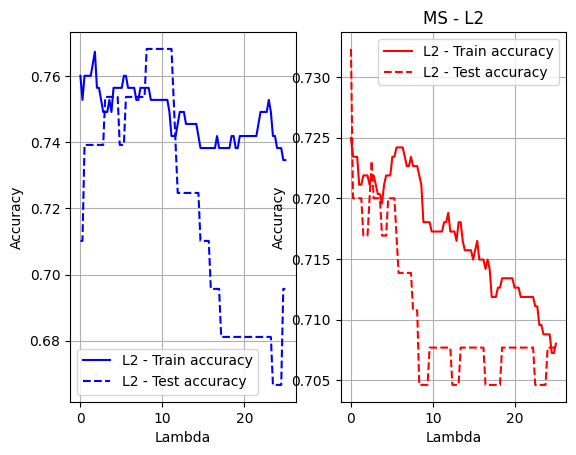

In [40]:
# Plots
fig, axis = plt.subplots(1, 2)
ax = axis[0]
ax.plot(lambdas, train_acc_l1_array_hp, color='blue', label='L1 - Train accuracy')
ax.plot(lambdas, test_acc_l1_array_hp, color='blue', linestyle='--', label='L1 - Test accuracy')

ax.set_xlabel('Lambda')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)

plt.title(f'HP - L1')

ax = axis[1]
ax.plot(lambdas, train_acc_l1_array_ms, color='red', label='L1 - Train accuracy')
ax.plot(lambdas, test_acc_l1_array_ms, color='red', linestyle='--', label='L1 - Test accuracy')

ax.set_xlabel('Lambda')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)

plt.title(f'MS - L1')
plt.show()


# L2
fig, axis = plt.subplots(1, 2)
ax = axis[0]
ax.plot(lambdas, train_acc_l2_array_hp, color='blue',label='L2 - Train accuracy')
ax.plot(lambdas, test_acc_l2_array_hp, color='blue', linestyle='--', label='L2 - Test accuracy')

ax.set_xlabel('Lambda')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)
plt.title(f'HP - L2')

ax = axis[1]
ax.plot(lambdas, train_acc_l2_array_ms, color='red',label='L2 - Train accuracy')
ax.plot(lambdas, test_acc_l2_array_ms, color='red', linestyle='--', label='L2 - Test accuracy')

ax.set_xlabel('Lambda')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)
plt.title(f'MS - L2')


Check the evolution of the weights

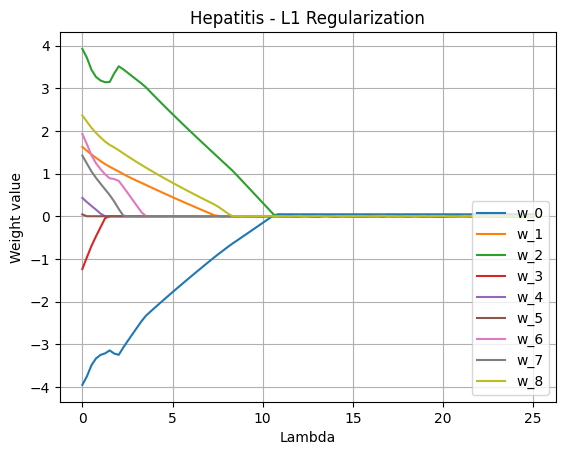

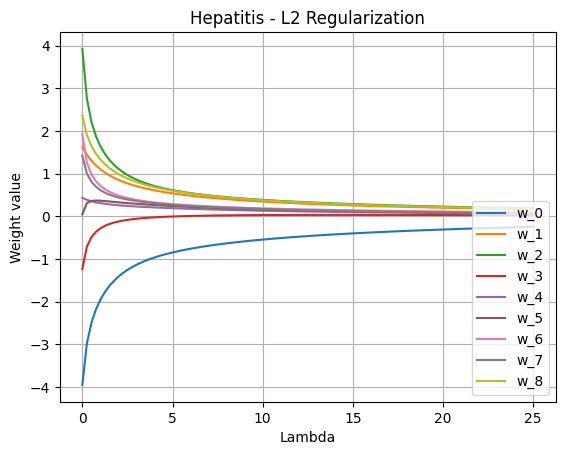

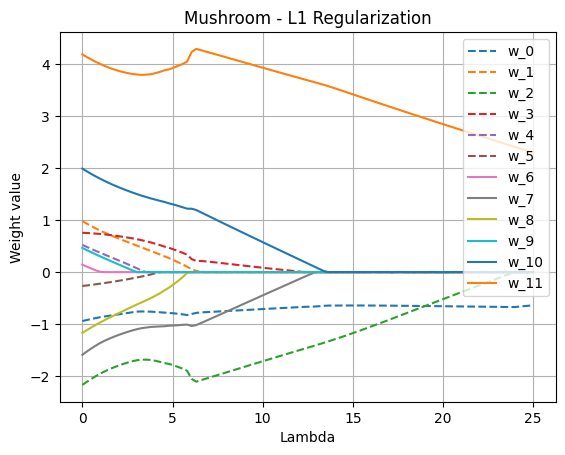

Text(0.5, 1.0, 'Mushroom - L2 Regularization')

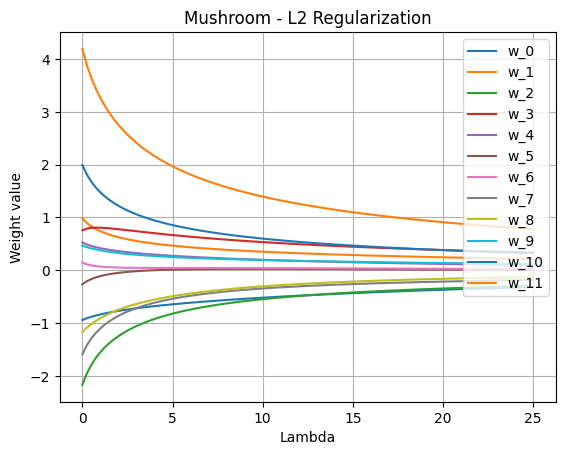

In [41]:
l1_weights_hp = np.array(l1_weights_hp)

# Plots
fig, ax1 = plt.subplots()
for i in range(l1_weights_hp.shape[1]):
    ax1.plot(lambdas, l1_weights_hp[:, i], label=f'w_{i}')

ax1.set_xlabel('Lambda')
ax1.set_ylabel('Weight value')
ax1.legend(loc='lower right')
ax1.grid(True)

plt.title(f'Hepatitis - L1 Regularization')

plt.show()

# L2
l2_weights_hp = np.array(l2_weights_hp)

# Plots
fig, ax2 = plt.subplots()
for i in range(l2_weights_hp.shape[1]):
    ax2.plot(lambdas, l2_weights_hp[:, i], label=f'w_{i}')

ax2.set_xlabel('Lambda')
ax2.set_ylabel('Weight value')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.title(f'Hepatitis - L2 Regularization')

# ### Mushroom ###

l1_weights_ms = np.array(l1_weights_ms)
fig, ax1 = plt.subplots()
for i in range(l1_weights_ms.shape[1]):
    if i > 5:
        ax1.plot(lambdas, l1_weights_ms[:, i], label=f'w_{i}')
    else:
        ax1.plot(lambdas, l1_weights_ms[:, i], label=f'w_{i}', linestyle='--')


ax1.set_xlabel('Lambda')
ax1.set_ylabel('Weight value')
ax1.legend(loc='upper right')
ax1.grid(True)

plt.title(f'Mushroom - L1 Regularization')

plt.show()

# L2
l2_weights_ms = np.array(l2_weights_ms)

fig, ax2 = plt.subplots()
for i in range(l2_weights_ms.shape[1]):
    ax2.plot(lambdas, l2_weights_ms[:, i], label=f'w_{i}')

ax2.set_xlabel('Lambda')
ax2.set_ylabel('Weight value')
ax2.legend(loc='upper right')
ax2.grid(True)

plt.title(f'Mushroom - L2 Regularization')


### Best Hyperparameters

To find the combination of $\alpha$, $\lambda$ and $\epsilon$ that give the best k-fold accuracy.

In [42]:
### Hepatitis ###
print(f"### Hepatitis Dataset ###")

alphas = []
lambdas = [0, 0.1, 0.5, 1, 1.5, 2, 2.5, 3, 5] # np.linspace(0, 5, 4)
alphas = [0.01, 0.1, 1, 1.5, 2, 5]  # np.linspace(0.05, 2, 4)
tols = [1e-4]
max_iter = 4000

model_hp = LogisticRegression(
    reg='l1',
    reg_cst=lambdas,
    max_iter=max_iter,
    alpha=alphas,
    tol=tols,
    k_cv=10, # No CV
    learning_rate_type="normal",
)

model_hp.fit(X_train_hp, y_train_hp)
hp_acc = model_hp.accu_eval(X_test_hp, y_test_hp)

print(f"\n\nFinal Accuracy: {hp_acc}")

print(model_hp.results.sort_values(by=['Accuracy', 'Lambda'], ascending=False).to_string())

### Hepatitis Dataset ###


Final Accuracy: 0.7391304347826086
    Accuracy  Alpha  Tolerance  Lambda   Comp time  Converged
18  0.738360   1.00     0.0001     0.0   26.953292       True
28  0.738228   1.50     0.0001     0.1   27.015686       True
27  0.738095   1.50     0.0001     0.0   26.691341       True
19  0.734656   1.00     0.0001     0.1   26.545429       True
45  0.734524   5.00     0.0001     0.0   44.110799       True
48  0.730952   5.00     0.0001     1.0  557.349229      False
46  0.730820   5.00     0.0001     0.1   19.728279       True
37  0.730688   2.00     0.0001     0.1   27.369404       True
20  0.727381   1.00     0.0001     0.5   24.380255       True
21  0.727249   1.00     0.0001     1.0   20.823288       True
29  0.727249   1.50     0.0001     0.5   41.103983       True
36  0.726984   2.00     0.0001     0.0   28.963137       True
38  0.723545   2.00     0.0001     0.5   22.234631       True
39  0.723413   2.00     0.0001     1.0   46.830153       True
47  0.7

In [43]:
### Mushroom ###
print(f"### Mushroom Dataset ###")

model_ms = LogisticRegression(
    reg='l1',
    reg_cst=lambdas,
    max_iter=max_iter,
    alpha=alphas,
    tol=tols,
    k_cv=10, # No CV
    learning_rate_type="normal",
)

model_ms.fit(X_train_ms, y_train_ms)
ms_acc = model_ms.accu_eval(X_test_ms, y_test_ms)

print(f"\n\nFinal Accuracy: {ms_acc}")

print(model_ms.results.sort_values(by=['Accuracy', 'Lambda'], ascending=False).to_string())

### Mushroom Dataset ###


Final Accuracy: 0.7323076923076923
    Accuracy  Alpha  Tolerance  Lambda    Comp time  Converged
39  0.739618   2.00     0.0001     1.0    59.946895       True
48  0.739606   5.00     0.0001     1.0   265.915585       True
47  0.738837   5.00     0.0001     0.5    64.810872       True
38  0.738086   2.00     0.0001     0.5    58.041263       True
37  0.737317   2.00     0.0001     0.1   102.749181       True
36  0.737317   2.00     0.0001     0.0    66.517186       True
50  0.737305   5.00     0.0001     2.0  1300.186014      False
49  0.736524   5.00     0.0001     1.5  1118.647695      False
46  0.736524   5.00     0.0001     0.1    78.972888       True
42  0.735778   2.00     0.0001     2.5   170.247626       True
32  0.735021   1.50     0.0001     2.0    53.977394       True
43  0.735003   2.00     0.0001     3.0   114.070463       True
45  0.734979   5.00     0.0001     0.0   100.679183       True
31  0.734252   1.50     0.0001     1.5    93.553424     

## Feature Expansion

To check the accuracy improvement when using feature expansion.

In [44]:
class feature_expansion:
    def __init__(self, new_data_array, ft, ind, n):
        self.new_data_array = new_data_array
        self.ft = ft
        self.ind = ind
        self.n = n
        train_data = self.new_data_array.iloc[self.ind[:self.n]]
        test_data = self.new_data_array.iloc[self.ind[self.n:]]
        self.x_train = train_data[self.ft].to_numpy()
        self.y_train = train_data["Label"].to_numpy()
        self.x_test = test_data[self.ft].to_numpy()
        self.y_test = test_data["Label"].to_numpy()

    def divide(self):
        return self.x_train, self.y_train, self.x_test, self.y_test

    def feat_exp(self, base):
        new_ds = []
        index = len(self.ft)+1

        for i in range(len(self.ft)):
            ds_exp = np.array(np.insert(base, index, self.x_train[:,i], axis = 1))
            new_ds.append(ds_exp)

        return new_ds

    def feat_rem(self, base):
        new_ds = []
        index = len(self.ft)+1

        for i in range(len(self.ft)):
            ds_exp = np.delete(base, i+1, axis=1)
            new_ds.append(ds_exp)

        return new_ds

#### Hepatitis

In [45]:
max_iter = 4000
tol = 1e-4

# Model
model_hp = LogisticRegression(
    reg='l1',
    reg_cst=0,
    max_iter=max_iter,
    alpha=1,
    tol=tol,
    k_cv=10,
    learning_rate_type="normal",
)

# Base accuracy
ds1_X = X_train_hp
model_hp.fit(X_train_hp, y_train_hp, verbose=False)
hp_base_acc = model_hp.accu_eval(X_train_hp, y_train_hp)
print(f"Hepatitis: Accuracy w/o feature expansion: {hp_base_acc*100}%")

# 1 - Define datasets
hp_models_dict = {}

square_feature_expansion = feature_expansion(hp_sq_df, hp_features, indices_hp, n_training_hp)
sq_feat_exp = square_feature_expansion.feat_exp(X_train_hp)

hp_models_dict["**2, ft1"] = sq_feat_exp[0]
hp_models_dict["**2, ft2"] = sq_feat_exp[1]
hp_models_dict["**2, ft3"] = sq_feat_exp[2]
hp_models_dict["**2, ft4"] = sq_feat_exp[3]
hp_models_dict["**2, ft5"] = sq_feat_exp[4]
hp_models_dict["**2, ft6"] = sq_feat_exp[5]
hp_models_dict["**2, ft7"] = sq_feat_exp[6]
hp_models_dict["**2, ft8"] = sq_feat_exp[7]

cube_feature_expansion = feature_expansion(hp_cb_df, hp_features, indices_hp, n_training_hp)
cb_feat_exp = cube_feature_expansion.feat_exp(X_train_hp)

hp_models_dict["**3, ft1"] = cb_feat_exp[0]
hp_models_dict["**3, ft2"] = cb_feat_exp[1]
hp_models_dict["**3, ft3"] = cb_feat_exp[2]
hp_models_dict["**3, ft4"] = cb_feat_exp[3]
hp_models_dict["**3, ft5"] = cb_feat_exp[4]
hp_models_dict["**3, ft6"] = cb_feat_exp[5]
hp_models_dict["**3, ft7"] = cb_feat_exp[6]
hp_models_dict["**3, ft8"] = cb_feat_exp[7]

sqrt_feature_expansion = feature_expansion(hp_sqrt_df, hp_features, indices_hp, n_training_hp)
sqrt_feat_exp = sqrt_feature_expansion.feat_exp(X_train_hp)

hp_models_dict["sqrt, ft1"] = sqrt_feat_exp[0]
hp_models_dict["sqrt, ft2"] = sqrt_feat_exp[1]
hp_models_dict["sqrt, ft3"] = sqrt_feat_exp[2]
hp_models_dict["sqrt, ft4"] = sqrt_feat_exp[3]
hp_models_dict["sqrt, ft5"] = sqrt_feat_exp[4]
hp_models_dict["sqrt, ft6"] = sqrt_feat_exp[5]
hp_models_dict["sqrt, ft7"] = sqrt_feat_exp[6]
hp_models_dict["sqrt, ft8"] = sqrt_feat_exp[7]

ln_feature_expansion = feature_expansion(hp_ln_df, hp_features, indices_hp, n_training_hp)
ln_feat_exp = ln_feature_expansion.feat_exp(X_train_hp)

hp_models_dict["ln, ft1"] = ln_feat_exp[0]
hp_models_dict["ln, ft2"] = ln_feat_exp[1]
hp_models_dict["ln, ft3"] = ln_feat_exp[2]
hp_models_dict["ln, ft4"] = ln_feat_exp[3]
hp_models_dict["ln, ft5"] = ln_feat_exp[4]
hp_models_dict["ln, ft6"] = ln_feat_exp[5]
hp_models_dict["ln, ft7"] = ln_feat_exp[6]
hp_models_dict["ln, ft8"] = ln_feat_exp[7]

# The sq dataset won't be used, but we still have to feed some dataset to the class
remove_feature= feature_expansion(hp_sq_df, hp_features, indices_hp, n_training_hp)
remove_feat= remove_feature.feat_rem(X_train_hp)

hp_models_dict["-, ft1"] = remove_feat[0]
hp_models_dict["-, ft2"] = remove_feat[1]
hp_models_dict["-, ft3"] = remove_feat[2]
hp_models_dict["-, ft4"] = remove_feat[3]
hp_models_dict["-, ft5"] = remove_feat[4]
hp_models_dict["-, ft6"] = remove_feat[5]
hp_models_dict["-, ft7"] = remove_feat[6]
hp_models_dict["-, ft8"] = remove_feat[7]

hp_feat_exp_results = []


# 2 - Fit
for model_name, each_dataset in hp_models_dict.items():
    ds = each_dataset

    model_hp.fit(ds, y_train_hp, verbose=False)

    acc = model_hp.accu_eval(ds, y_train_hp)

    acc_imp = 100*(acc - hp_base_acc)

    # print(f"{model_name}: {100*(each_dataset[1] - hp_models_dict['ds base'][1])}")
    feat_type, features = model_name.split(',')
    hp_feat_exp_results.append(
        {'Type': feat_type,
        'Feature': features,
        'Acc': np.round(acc_imp, 2)
        }
    )

hp_feat_exp_results = pd.DataFrame(hp_feat_exp_results)

# Check results
hp_feat_exp_results.sort_values(by=['Type', 'Acc'], ascending=False)

Hepatitis: Accuracy w/o feature expansion: 76.36363636363637%


,Type,Feature,Acc
18,sqrt,ft3,1.45
22,sqrt,ft7,1.45
20,sqrt,ft5,1.09
16,sqrt,ft1,0.36
17,sqrt,ft2,0.36
19,sqrt,ft4,0.36
23,sqrt,ft8,0.36
21,sqrt,ft6,0.00
30,ln,ft7,1.09
24,ln,ft1,0.73


#### Mushrooms

In [46]:
model_ms = LogisticRegression(
    reg='l1',
    reg_cst=1,
    max_iter=max_iter,
    alpha=2,
    tol=tol,
    k_cv=10,
    learning_rate_type="normal",
)

# Base accuracy

ms_ds1_X = X_train_ms

model_ms.fit(ms_ds1_X, y_train_ms, verbose=False)
ms_base_acc = model_ms.accu_eval(ms_ds1_X, y_train_ms)
print(f"Mushroom: Accuracy w/o feature expansion: {ms_base_acc*100}%")

# 1 - Define datasets
ms_models_dict = {}
square_feature_expansion = feature_expansion(ms_sq_df, ms_features, indices_ms, n_training_ms)
sq_feat_exp = square_feature_expansion.feat_exp(X_train_ms)

ms_models_dict["**2, ft1"] = [sq_feat_exp[0], 0]
ms_models_dict["**2, ft2"] = [sq_feat_exp[1], 0]
ms_models_dict["**2, ft3"] = [sq_feat_exp[2], 0]
ms_models_dict["**2, ft4"] = [sq_feat_exp[3], 0]
ms_models_dict["**2, ft5"] = [sq_feat_exp[4], 0]
ms_models_dict["**2, ft6"] = [sq_feat_exp[5], 0]
ms_models_dict["**2, ft7"] = [sq_feat_exp[6], 0]
ms_models_dict["**2, ft8"] = [sq_feat_exp[7], 0]
ms_models_dict["**2, ft9"] = [sq_feat_exp[8], 0]
ms_models_dict["**2, ft10"] = [sq_feat_exp[9], 0]
ms_models_dict["**2, ft11"] = [sq_feat_exp[10], 0]

cube_feature_expansion = feature_expansion(ms_cb_df, ms_features, indices_ms, n_training_ms)
cb_feat_exp = cube_feature_expansion.feat_exp(X_train_ms)

ms_models_dict["**3, ft1"] = [cb_feat_exp[0], 0]
ms_models_dict["**3, ft2"] = [cb_feat_exp[1], 0]
ms_models_dict["**3, ft3"] = [cb_feat_exp[2], 0]
ms_models_dict["**3, ft4"] = [cb_feat_exp[3], 0]
ms_models_dict["**3, ft5"] = [cb_feat_exp[4], 0]
ms_models_dict["**3, ft6"] = [cb_feat_exp[5], 0]
ms_models_dict["**3, ft7"] = [cb_feat_exp[6], 0]
ms_models_dict["**3, ft8"] = [cb_feat_exp[7], 0]
ms_models_dict["**3, ft9"] = [cb_feat_exp[8], 0]
ms_models_dict["**3, ft10"] = [cb_feat_exp[9], 0]
ms_models_dict["**3, ft11"] = [cb_feat_exp[10], 0]

sqrt_feature_expansion = feature_expansion(ms_sqrt_df, ms_features, indices_ms, n_training_ms)
sqrt_feat_exp = sqrt_feature_expansion.feat_exp(X_train_ms)

ms_models_dict["sqrt, ft1"] = [sqrt_feat_exp[0], 0]
ms_models_dict["sqrt, ft2"] = [sqrt_feat_exp[1], 0]
ms_models_dict["sqrt, ft3"] = [sqrt_feat_exp[2], 0]
ms_models_dict["sqrt, ft4"] = [sqrt_feat_exp[3], 0]
ms_models_dict["sqrt, ft5"] = [sqrt_feat_exp[4], 0]
ms_models_dict["sqrt, ft6"] = [sqrt_feat_exp[5], 0]
ms_models_dict["sqrt, ft7"] = [sqrt_feat_exp[6], 0]
ms_models_dict["sqrt, ft8"] = [sqrt_feat_exp[7], 0]
ms_models_dict["sqrt, ft9"] = [sqrt_feat_exp[8], 0]
ms_models_dict["sqrt, ft10"] = [sqrt_feat_exp[9], 0]
ms_models_dict["sqrt, ft11"] = [sqrt_feat_exp[10], 0]


ln_feature_expansion = feature_expansion(ms_ln_df, ms_features, indices_ms, n_training_ms)
ln_feat_exp = ln_feature_expansion.feat_exp(X_train_ms)

ms_models_dict["ln, ft1"] = [ln_feat_exp[0], 0]
ms_models_dict["ln, ft2"] = [ln_feat_exp[1], 0]
ms_models_dict["ln, ft3"] = [ln_feat_exp[2], 0]
ms_models_dict["ln, ft4"] = [ln_feat_exp[3], 0]
ms_models_dict["ln, ft5"] = [ln_feat_exp[4], 0]
ms_models_dict["ln, ft6"] = [ln_feat_exp[5], 0]
ms_models_dict["ln, ft7"] = [ln_feat_exp[6], 0]
ms_models_dict["ln, ft8"] = [ln_feat_exp[7], 0]
ms_models_dict["ln, ft9"] = [ln_feat_exp[8], 0]
ms_models_dict["ln, ft10"] = [ln_feat_exp[9], 0]
ms_models_dict["ln, ft11"] = [ln_feat_exp[10], 0]

# The sq dataset won't be used, but we still have to feed some dataset to the class
remove_feature= feature_expansion(ms_sq_df, ms_features, indices_ms, n_training_ms)
remove_feat= remove_feature.feat_rem(X_train_ms)

ms_models_dict["-, ft1"] = [remove_feat[0], 0]
ms_models_dict["-, ft2"] = [remove_feat[1], 0]
ms_models_dict["-, ft3"] = [remove_feat[2], 0]
ms_models_dict["-, ft4"] = [remove_feat[3], 0]
ms_models_dict["-, ft5"] = [remove_feat[4], 0]
ms_models_dict["-, ft6"] = [remove_feat[5], 0]
ms_models_dict["-, ft7"] = [remove_feat[6], 0]
ms_models_dict["-, ft8"] = [remove_feat[7], 0]
ms_models_dict["-, ft9"] = [remove_feat[8], 0]
ms_models_dict["-, ft10"] = [remove_feat[9], 0]
ms_models_dict["-, ft11"] = [remove_feat[10], 0]

# 2 - Fit
ms_feat_exp_results = []

for model_name, each_dataset in ms_models_dict.items():
    ds = each_dataset[0]

    model_ms.fit(ds, y_train_ms, verbose=False)

    acc = model_ms.accu_eval(ds, y_train_ms)

    each_dataset[1] = acc
    # print(f"{model_name}: {100*(each_dataset[1] - ms_models_dict['ds base'][1])}")

    acc_imp = 100*(each_dataset[1] - ms_base_acc)

    feat_type, features = model_name.split(',')

    ms_feat_exp_results.append(
        {'Type': feat_type,
        'Feature': features,
        'Acc': np.round(acc_imp, 2)
        }
    )

ms_feat_exp_results = pd.DataFrame(ms_feat_exp_results)

# Check results
ms_feat_exp_results.sort_values(by=['Type', 'Acc'], ascending=False)

Mushroom: Accuracy w/o feature expansion: 73.72881355932203%


,Type,Feature,Acc
29,sqrt,ft8,0.39
31,sqrt,ft10,0.39
22,sqrt,ft1,0.23
23,sqrt,ft2,0.15
24,sqrt,ft3,0.15
28,sqrt,ft7,0.15
26,sqrt,ft5,0.08
32,sqrt,ft11,0.08
25,sqrt,ft4,0.00
27,sqrt,ft6,0.00


### Combinations

Features showing the best improvements are combined.

#### Hepatitis

In [47]:
# Get dataset with all features processed  self.x_train, self.y_train, self.x_test, self.y_test
# X_train_hp # Base dataset
X_hp_sq_feat, _, X_hp_sq_feat_test, _ = feature_expansion(hp_sq_df, hp_features, indices_hp, n_training_hp).divide()
X_hp_cb_feat, _, X_hp_cb_feat_test, _ = feature_expansion(hp_cb_df, hp_features, indices_hp, n_training_hp).divide()
X_hp_sqrt_feat, _, X_hp_sqrt_feat_test, _ = feature_expansion(hp_sqrt_df, hp_features, indices_hp, n_training_hp).divide()
X_hp_ln_feat, _, X_hp_ln_feat_test, _ = feature_expansion(hp_ln_df, hp_features, indices_hp, n_training_hp).divide()

# Define datasets
hp_comb_dict = {}

new_X = np.insert(X_train_hp, X_train_hp.shape[1], X_hp_sqrt_feat[:, 2], axis=1) # sqrt(x_3)
new_X = np.insert(new_X, new_X.shape[1], X_hp_sqrt_feat[:, 6], axis=1) # sqrt(x_7)
hp_comb_dict['sqrt(3), sqrt(7)'] = new_X

new_X = np.insert(X_train_hp, X_train_hp.shape[1], X_hp_sqrt_feat[:, 2], axis=1) # sqrt(x_3)
new_X = np.insert(new_X, new_X.shape[1], X_hp_sqrt_feat[:, 6], axis=1) # sqrt(x_7)
new_X = np.delete(new_X, 7, axis=1) # rem(x_7)
hp_comb_dict['sqrt(3), sqrt(7), rem(7)'] = new_X

new_X = np.insert(X_train_hp, X_train_hp.shape[1], X_hp_sqrt_feat[:, 2], axis=1) # sqrt(x_3)
new_X = np.insert(new_X, new_X.shape[1], X_hp_sqrt_feat[:, 6], axis=1) # sqrt(x_7)
new_X = np.delete(new_X, 4, axis=1) # rem(x_4)
hp_comb_dict['sqrt(3), sqrt(7), rem(4)'] = new_X

new_X = np.insert(X_train_hp, X_train_hp.shape[1], X_hp_sqrt_feat[:, 2], axis=1) # sqrt(x_3)
new_X = np.insert(new_X, new_X.shape[1], X_hp_sqrt_feat[:, 6], axis=1) # sqrt(x_7)
new_X = np.delete(new_X, 5, axis=1) # rem(x_5)
hp_comb_dict['sqrt(3), sqrt(7), rem(5)'] = new_X

new_X = np.insert(X_train_hp, X_train_hp.shape[1], X_hp_sqrt_feat[:, 2], axis=1) # sqrt(x_3)
new_X = np.insert(new_X, new_X.shape[1], X_hp_sqrt_feat[:, 6], axis=1) # sqrt(x_7)
new_X = np.delete(new_X, 5, axis=1) # rem(x_5)
new_X = np.delete(new_X, 6, axis=1) # rem(x_7)
hp_comb_dict['sqrt(3), sqrt(7), rem(5), rem(7)'] = new_X


# Compute accuracy of each dataset
hp_comb_results = []
for model_name, each_dataset in hp_comb_dict.items():
    ds = each_dataset

    model_hp.fit(ds, y_train_hp, verbose=False)

    acc = model_hp.accu_eval(ds, y_train_hp)

    acc_imp = 100*(acc - hp_base_acc)

    # print(f"{model_name}: {100*(each_dataset[1] - hp_models_dict['ds base'][1])}")
    hp_comb_results.append(
        {'Combination': model_name,
        'Acc': acc_imp #np.round(acc_imp, 2)
        }
    )

hp_comb_results = pd.DataFrame(hp_comb_results)

# Print
hp_comb_results.sort_values(by=['Acc'], ascending=False)

,Combination,Acc
4,"sqrt(3), sqrt(7), rem(5), rem(7)",2.545455
0,"sqrt(3), sqrt(7)",1.818182
3,"sqrt(3), sqrt(7), rem(5)",1.818182
1,"sqrt(3), sqrt(7), rem(7)",1.454545
2,"sqrt(3), sqrt(7), rem(4)",1.454545


In [48]:
# Best dataset

# sqrt(3), sqrt(7), rem(5), rem(7)
X_hp_best_train = np.insert(X_train_hp, X_train_hp.shape[1], X_hp_sqrt_feat[:, 2], axis=1) # sqrt(x_3)
X_hp_best_train = np.insert(X_hp_best_train, X_hp_best_train.shape[1], X_hp_sqrt_feat[:, 6], axis=1) # sqrt(x_7)
X_hp_best_train = np.delete(X_hp_best_train, 5, axis=1) # rem(x_5)
X_hp_best_train = np.delete(X_hp_best_train, 6, axis=1) # rem(x_7)

X_hp_best_test = np.insert(X_test_hp, X_test_hp.shape[1], X_hp_sqrt_feat_test[:, 2], axis=1) # sqrt(x_3)
X_hp_best_test = np.insert(X_hp_best_test, X_hp_best_test.shape[1], X_hp_sqrt_feat_test[:, 6], axis=1) # sqrt(x_7)
X_hp_best_test = np.delete(X_hp_best_test, 5, axis=1) # rem(x_5)
X_hp_best_test = np.delete(X_hp_best_test, 6, axis=1) # rem(x_7)



##### Mushroom

In [49]:
# Get dataset with all features processed
# X_train_ms # Base dataset
X_ms_sq_feat, _, X_ms_sq_feat_test, _ = feature_expansion(ms_sq_df, ms_features, indices_ms, n_training_ms).divide()
X_ms_cb_feat, _, X_ms_cb_feat_test, _ = feature_expansion(ms_cb_df, ms_features, indices_ms, n_training_ms).divide()
X_ms_sqrt_feat, _, X_ms_sqrt_feat_test, _ = feature_expansion(ms_sqrt_df, ms_features, indices_ms, n_training_ms).divide()
X_ms_ln_feat, _, X_ms_ln_feat_test, _ = feature_expansion(ms_ln_df, ms_features, indices_ms, n_training_ms).divide()


# Define datasets
ms_comb_dict = {}

new_X = np.delete(X_train_ms, 8, axis=1) # rem(x_8)
new_X = np.delete(new_X, 4, axis=1) # rem(x_5)
ms_comb_dict['rm(8), rem(5)'] = new_X


new_X = np.delete(X_train_ms, 8, axis=1) # rem(x_8)
new_X = np.delete(new_X, 5, axis=1) # rem(x_6)
ms_comb_dict['rm(8), rem(6)'] = new_X


new_X = np.delete(X_train_ms, 8, axis=1) # rem(x_8)
new_X = np.delete(new_X, 8, axis=1) # rem(x_9)
ms_comb_dict['rm(8), rem(9)'] = new_X


new_X = np.delete(X_train_ms, 8, axis=1) # rem(x_8)
new_X = np.delete(new_X, 4, axis=1) # rem(x_5)
new_X = np.delete(new_X, 4, axis=1) # rem(x_6)
ms_comb_dict['rm(8), rem(5), rem(6)'] = new_X


new_X = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_sqrt_feat[:, 7], axis=1) # sqrt(x_8)
new_X = np.insert(new_X, new_X.shape[1], X_ms_sqrt_feat[:, 9], axis=1) # sqrt(x_10)
ms_comb_dict['sqrt(8), sqrt(10)'] = new_X


new_X = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_sqrt_feat[:, 7], axis=1) # sqrt(x_8)
new_X = np.insert(new_X, new_X.shape[1], X_ms_sqrt_feat[:, 9], axis=1) # sqrt(x_10)
new_X = np.delete(new_X, 5, axis=1) # rem(x_5)
ms_comb_dict['sqrt(8), sqrt(10), rm(5)'] = new_X


new_X = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_sqrt_feat[:, 7], axis=1) # sqrt(x_8)
new_X = np.delete(new_X, 8, axis=1) # rem(x_8)
ms_comb_dict['sqrt(8), rm(8)'] = new_X


new_X = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_sqrt_feat[:, 7], axis=1) # sqrt(x_8)
new_X = np.delete(new_X, 8, axis=1) # rem(x_8)
new_X = np.delete(new_X, 4, axis=1) # rem(x_5)
ms_comb_dict['sqrt(8), rm(8), rm(5)'] = new_X


new_X = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_cb_feat[:, 2], axis=1) # x_3**3
new_X = np.delete(new_X, 8, axis=1) # rem(x_8)
ms_comb_dict['rm(8), 3**3'] = new_X


new_X = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_cb_feat[:, 9], axis=1) # x_10**3
new_X = np.delete(new_X, 8, axis=1) # rem(x_8)
ms_comb_dict['rm(8), 10**3'] = new_X


new_X = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_sq_feat[:, 0], axis=1) # x_1**2
new_X = np.delete(new_X, 8, axis=1) # rem(x_8)
ms_comb_dict['rm(8), 1**2'] = new_X


new_X = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_ln_feat[:, 9], axis=1) # x_10**3
new_X = np.delete(new_X, 8, axis=1) # rem(x_8)
ms_comb_dict['rm(8), ln(10)'] = new_X


new_X = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_cb_feat[:, 2], axis=1) # x_3**3
new_X = np.delete(new_X, 8, axis=1) # rem(x_8)
new_X = np.delete(new_X, 4, axis=1) # rem(x_5)
ms_comb_dict['rm(8), 3**3, rm(5)'] = new_X


new_X = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_cb_feat[:, 9], axis=1) # x_10**3
new_X = np.delete(new_X, 8, axis=1) # rem(x_8)
new_X = np.delete(new_X, 4, axis=1) # rem(x_5)
ms_comb_dict['rm(8), 10**3, rm(5)'] = new_X


new_X = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_sq_feat[:, 0], axis=1) # x_1**2
new_X = np.delete(new_X, 8, axis=1) # rem(x_8)
new_X = np.delete(new_X, 4, axis=1) # rem(x_5)
ms_comb_dict['rm(8), 1**2, rm(5)'] = new_X

new_X = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_cb_feat[:, 2], axis=1) # x_3**3
new_X = np.insert(new_X, new_X.shape[1], X_ms_sq_feat[:, 0], axis=1) # x_1**2
new_X = np.delete(new_X, 8, axis=1) # rem(x_8)
new_X = np.delete(new_X, 4, axis=1) # rem(x_5)
ms_comb_dict['rm(8), rm(5), 3**3, 1**2'] = new_X


new_X = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_cb_feat[:, 2], axis=1) # x_3**3
new_X = np.insert(new_X, new_X.shape[1], X_ms_sq_feat[:, 0], axis=1) # x_1**2
new_X = np.delete(new_X, 8, axis=1) # rem(x_8)
ms_comb_dict['rm(8), 3**3, 1**2'] = new_X

# Compute accuracy of each dataset
ms_comb_results = []
for model_name, each_dataset in ms_comb_dict.items():
    ds = each_dataset

    model_ms.fit(ds, y_train_ms, verbose=False)

    acc = model_ms.accu_eval(ds, y_train_ms)

    acc_imp = 100*(acc - ms_base_acc)

    # print(f"{model_name}: {100*(each_dataset[1] - ms_models_dict['ds base'][1])}")
    ms_comb_results.append(
        {'Combination': model_name,
        'Acc': acc_imp #np.round(acc_imp, 2)
        }
    )

ms_comb_results = pd.DataFrame(ms_comb_results)

ms_comb_results.sort_values(by=['Acc'], ascending=False)

,Combination,Acc
8,"rm(8), 3**3",0.847458
12,"rm(8), 3**3, rm(5)",0.847458
15,"rm(8), rm(5), 3**3, 1**2",0.847458
16,"rm(8), 3**3, 1**2",0.847458
10,"rm(8), 1**2",0.770416
14,"rm(8), 1**2, rm(5)",0.770416
9,"rm(8), 10**3",0.693374
13,"rm(8), 10**3, rm(5)",0.693374
0,"rm(8), rem(5)",0.616333
4,"sqrt(8), sqrt(10)",0.539291


In [50]:
# rem(8), rem(5), x_3**3
X_ms_best_train = np.insert(X_train_ms, X_train_ms.shape[1], X_ms_cb_feat[:, 2], axis=1) # x_3**3
X_ms_best_train = np.delete(X_ms_best_train, 8, axis=1) # rem(x_8)
X_ms_best_train = np.delete(X_ms_best_train, 4, axis=1) # rem(x_5)

X_ms_best_test = np.insert(X_test_ms, X_test_ms.shape[1], X_ms_cb_feat_test[:, 2], axis=1) # x_3**3
X_ms_best_test = np.delete(X_ms_best_test, 8, axis=1) # rem(x_8)
X_ms_best_test = np.delete(X_ms_best_test, 4, axis=1) # rem(x_5)

## Best Model

Final accuracy on test datasets.

Hepatatis:
  - $\sqrt(x_3), \sqrt(x_7), rm(x_5), rm(x_7)$

Mushroom:
  - $rm(x_8), rm(x_5), x_3^3$

In [51]:
# Hepatitis
max_iter = 4000
tol = 1e-4

# Model
model_hp = LogisticRegression(
    reg='l1',
    reg_cst=0,
    max_iter=max_iter,
    alpha=1,
    tol=tol,
    k_cv=10,
    learning_rate_type="normal",
)

# base acc
model_hp.fit(X_train_hp, y_train_hp)
hp_base_acc = model_hp.accu_eval(X_test_hp, y_test_hp)


model_hp.fit(X_hp_best_train, y_train_hp)
hp_final_acc = model_hp.accu_eval(X_hp_best_test, y_test_hp)


# Mushrooom
model_ms = LogisticRegression(
    reg='l1',
    reg_cst=1,
    max_iter=max_iter,
    alpha=2,
    tol=tol,
    k_cv=10,
    learning_rate_type="normal",
)

model_ms.fit(X_train_ms, y_train_ms)
ms_base_acc = model_ms.accu_eval(X_test_ms, y_test_ms)

model_ms.fit(X_ms_best_train, y_train_ms)
ms_final_acc = model_ms.accu_eval(X_ms_best_test, y_test_ms)


print(f"Final test accuracies:")
print(f"\tHepatitis: {hp_final_acc} \t(Test acc w/o feat: {hp_base_acc})")
print(f"\tMushroom: {ms_final_acc} \t(Test acc w/o feat: {ms_base_acc})")

Final test accuracies:
	Hepatitis: 0.7536231884057971 	(Test acc w/o feat: 0.7391304347826086)
	Mushroom: 0.7507692307692307 	(Test acc w/o feat: 0.7323076923076923)
